<a href="https://colab.research.google.com/github/frarus/AMLexam/blob/main/Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install tensorboardX==1.4

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os
import logging



In [5]:
if not os.path.isdir('./AMLexam'):

  !git clone 'https://github.com/frarus/AMLexam.git'


Cloning into 'AMLexam'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 205 (delta 76), reused 130 (delta 32), pack-reused 0
Receiving objects: 100% (205/205), 312.16 KiB | 5.57 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [12]:
cd AMLexam/

[Errno 2] No such file or directory: 'AMLexam/'
/content/AMLexam/BiSeNet


In [13]:
cd BiSeNet/

[Errno 2] No such file or directory: 'BiSeNet/'
/content/AMLexam/BiSeNet


In [ ]:
import json
variables = json.load(open('/content/drive/MyDrive/Datasets/Cityscapes/info.json', 'r'))
    
label_info=variables['palette']
print (label_info)
classes=variables['label']

[[128, 64, 128], [244, 35, 232], [70, 70, 70], [102, 102, 156], [190, 153, 153], [153, 153, 153], [250, 170, 30], [220, 220, 0], [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60], [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100], [0, 80, 100], [0, 0, 230], [119, 11, 32], [0, 0, 0]]


road
[[[128  64 128]]]


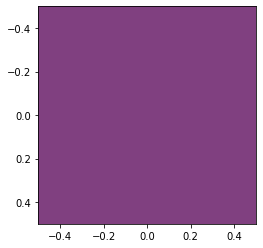

sidewalk
[[[244  35 232]]]


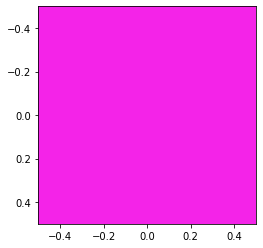

building
[[[70 70 70]]]


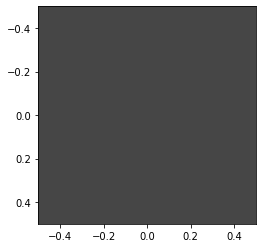

wall
[[[102 102 156]]]


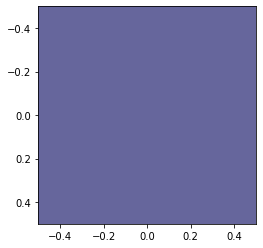

fence
[[[190 153 153]]]


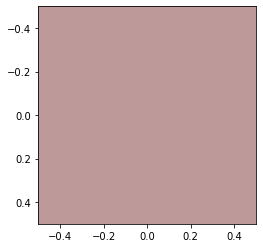

pole
[[[153 153 153]]]


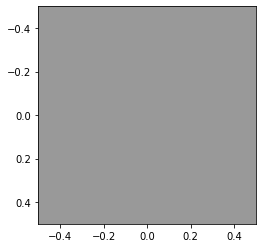

light
[[[250 170  30]]]


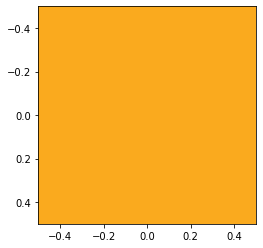

sign
[[[220 220   0]]]


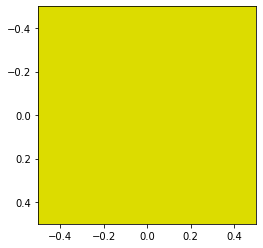

vegetation
[[[107 142  35]]]


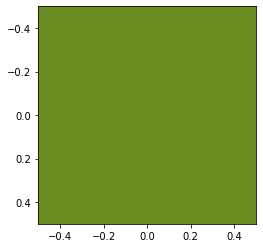

terrain
[[[152 251 152]]]


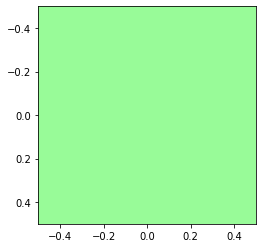

sky
[[[ 70 130 180]]]


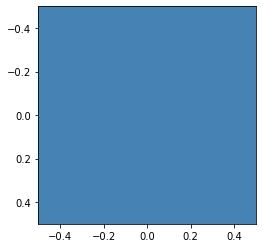

person
[[[220  20  60]]]


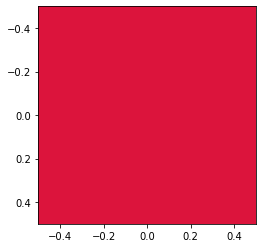

rider
[[[255   0   0]]]


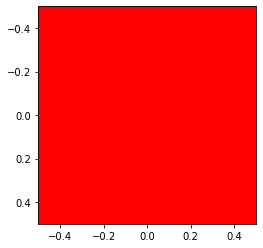

car
[[[  0   0 142]]]


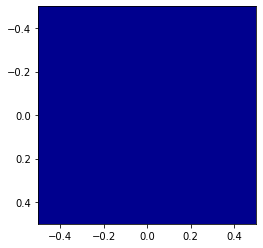

truck
[[[ 0  0 70]]]


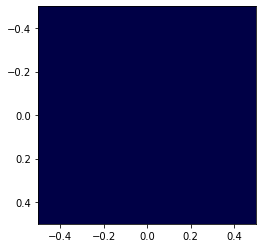

bus
[[[  0  60 100]]]


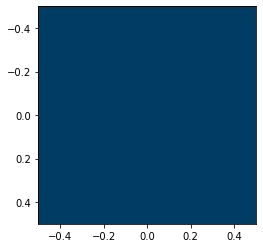

train
[[[  0  80 100]]]


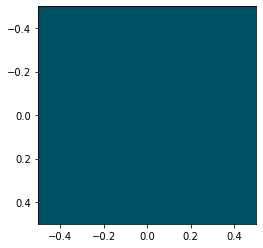

motocycle
[[[  0   0 230]]]


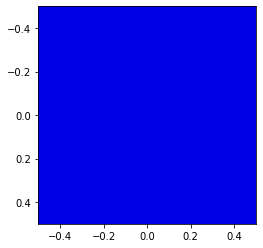

bicycle
[[[119  11  32]]]


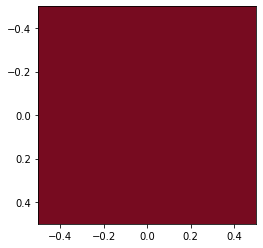

In [ ]:
import matplotlib.pyplot as plt
for i in range (len(classes)):
  print (classes[i])
  img=np.array([[label_info[i]]], dtype=np.ubyte)
  img = PIL.fromarray(img, 'RGB')
  plt.imshow(img)
  plt.show()

In [ ]:
from model.build_BiSeNet import BiSeNet
import torch
model = BiSeNet(19, 'resnet101')
model = torch.nn.DataParallel(model).cuda()

print('load model...')
checkpoint = torch.load('/content/drive/MyDrive/checkpoints_101_sgd_da/best_crossentropy_loss.pth')
# load pretrained model if exists
model.module.load_state_dict(checkpoint['model_state_dict'])
print('Done!')

load model...
Done!


In [ ]:
from SSL import create_pseudo_labels
create_pseudo_labels(model, '/content/drive/MyDrive/Datasets/pseudolabels_test', num_workers=8, batch_size=1)


[0.9968708157539368, 0.920551061630249, 0.9970410466194153, 0.7154638767242432, 0.6565930247306824, 0.620246410369873, 0.5886152386665344, 0.6843947172164917, 0.9893134236335754, 0.9131702184677124, 0.9997853636741638, 0.9231000542640686, 0.5538057684898376, 0.9874616265296936, 0.8128198981285095, 0.7287898659706116, 0.27012649178504944, 0.4560476541519165, 0]
[0.9        0.9        0.9        0.71546388 0.65659302 0.62024641
 0.58861524 0.68439472 0.9        0.9        0.9        0.9
 0.55380577 0.9        0.8128199  0.72878987 0.27012649 0.45604765
 0.        ]


In [ ]:
!python trainGTAtoCityscapespuntoc.py

epoch 0, lr 0.025000: 100% 1000/1000 [02:23<00:00,  6.99it/s]
average loss for train : 3.271510
start val!
precision per pixel for test: 0.645
mIoU for validation: 0.175
iter =        0/      75, loss_segmentation = 2.646 loss_adversarial = 0.691 loss_D = 0.687 
epoch 1, lr 0.024700: 100% 1000/1000 [02:21<00:00,  7.05it/s]
average loss for train : 2.012174
start val!
precision per pixel for test: 0.482
mIoU for validation: 0.144
iter =        1/      75, loss_segmentation = 1.845 loss_adversarial = 0.682 loss_D = 0.679 
epoch 2, lr 0.024399: 100% 1000/1000 [02:21<00:00,  7.05it/s]
average loss for train : 1.744484
start val!
precision per pixel for test: 0.489
mIoU for validation: 0.157
iter =        2/      75, loss_segmentation = 1.691 loss_adversarial = 0.752 loss_D = 0.677 
epoch 3, lr 0.024098: 100% 1000/1000 [02:22<00:00,  7.03it/s]
average loss for train : 1.512641
start val!
precision per pixel for test: 0.639
mIoU for validation: 0.211
iter =        3/      75, loss_segmentati

In [ ]:
!python eval.py

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100% 44.7M/44.7M [00:01<00:00, 30.3MB/s]
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100% 171M/171M [00:03<00:00, 45.8MB/s]
load model from /content/drive/MyDrive/checkpoints_101_sgd_DSC_withpseudolabels_3/best_crossentropy_loss.pth ...
The best epoch is 20
Done!
start test!
test: 100% 250/250 [15:45<00:00,  3.82s/it]precision per pixel for test: 0.688
mIoU for validation: 0.304
test: 100% 250/250 [15:47<00:00,  3.79s/it]


In [ ]:
!python trainGTAtoCityscapespuntoc.py

Traceback (most recent call last):
  File "trainGTAtoCityscapespuntoc.py", line 420, in <module>
    main(params)
  File "trainGTAtoCityscapespuntoc.py", line 255, in main
    tq = tqdm(total=(len(dataloader_target) + len (dataloader_source)) * args.batch_size)
UnboundLocalError: local variable 'dataloader_target' referenced before assignment


In [ ]:
from IPython.display import Image

import numpy as np
import torch
from torchvision import transforms
from PIL import Image as PIL
from dataset.Cityscapes_pseudo import Cityscapes_pseudo
import matplotlib.pyplot as plt

import json

In [ ]:
def colour_code_segmentation(image, label_values):
  colour_codes = np.array(label_values)
  x = image.astype(int)

  final = np.zeros((x.shape[0], x.shape[1],3), np.ubyte)
  x[x==255]=19
  final[:,:]=colour_codes[x]
  print(final.shape)
  return final

bremen_000264_000019
(512, 1024)
[[128, 64, 128], [244, 35, 232], [70, 70, 70], [102, 102, 156], [190, 153, 153], [153, 153, 153], [250, 170, 30], [220, 220, 0], [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60], [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100], [0, 80, 100], [0, 0, 230], [119, 11, 32], [0, 0, 0]]
(512, 1024, 3)
<class 'numpy.ndarray'> (512, 1024, 3)


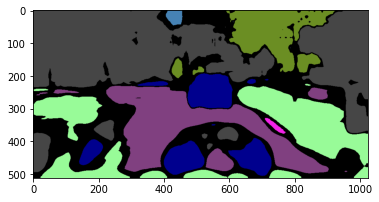

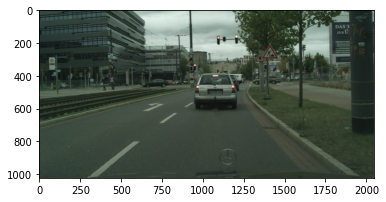

<bound method Image.show of <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2048x1024 at 0x7FE1E2F8B750>>

In [ ]:
train_dataset=Cityscapes_pseudo ()

convert_tensor = transforms.ToTensor()
index=499
img = PIL.open(train_dataset.files[index]['label'])
print(train_dataset.files[index]['name'])
img = np.asarray(img, np.ubyte)
info = json.load(open('/content/drive/MyDrive/Datasets/Cityscapes/info.json', 'r'))
#class_mapping = info['label2train']
# remap the semantic label
#img = encode_segmap(img, class_mapping, 255)
print(img.shape)
print (label_info)
#img=convert_tensor(img).numpy()
img = colour_code_segmentation(img, label_info)
print (type(img), img.shape)
img = PIL.fromarray(img, 'RGB')
#img = Image(train_dataset.files[0]['label'])
plt.imshow(img)
plt.show()
img.show
img.save("test_pseudo.png")
#print (train_dataset.files[0]['image'])
img_origin = PIL.open(train_dataset.files[index]['image'])
plt.imshow(img_origin)
plt.show()
img_origin.show

In [ ]:
!python trainGTAtoCityscapespuntoc.py

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100% 44.7M/44.7M [00:00<00:00, 171MB/s]
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100% 171M/171M [00:03<00:00, 58.8MB/s]
epoch 0, lr 0.025000: 100% 1000/1000 [02:25<00:00,  6.88it/s]
average loss for train : 3.075507
start val!
precision per pixel for test: 0.549
mIoU for validation: 0.160
iter =        0/      50, loss_segmentation = 2.263 loss_adversarial = 0.658 loss_D = 0.693 
tcmalloc: large alloc 2097152000 bytes == 0x559c8a8be000 @  0x7f8f8f594001 0x7f8e8e3ee54f 0x7f8e8e43eb58 0x7f8e8e442b17 0x7f8e8e4e1203 0x559bc2460390 0x559bc2460120 0x559bc24d4679 0x559bc24cf02f 0x559bc2461aba 0x559bc24d0cd4 0x559bc24619da 0x559bc24cfeae 0x559bc24cf02f 0x559bc24ced43 0x559bc2599302 0x559bc259967d 0x559bc2599526 0x559bc25711d3 0x559bc2570e7c 0x7f8f8e37cbf7 0x559bc2570d5a


In [ ]:
!python eval.py

load model from /content/drive/MyDrive/checkpoints_101_sgd_DSC_withpseudolabels/best_crossentropy_loss.pth ...
The best epoch is 39
Done!
start test!
test: 100% 250/250 [13:11<00:00,  3.30s/it]precision per pixel for test: 0.579
mIoU for validation: 0.168
test: 100% 250/250 [13:15<00:00,  3.18s/it]


In [ ]:
#resnet101
!python train.py

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100% 44.7M/44.7M [00:00<00:00, 56.9MB/s]
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100% 171M/171M [00:02<00:00, 60.2MB/s]
epoch 0, lr 0.025000: 100% 500/500 [01:36<00:00,  5.17it/s, loss=1.645083]
loss for train : 2.418889
start val!
precision per pixel for test: 0.730
mIoU for validation: 0.268
epoch 1, lr 0.024550: 100% 500/500 [01:29<00:00,  5.61it/s, loss=1.445451]
loss for train : 1.310970
start val!
precision per pixel for test: 0.737
mIoU for validation: 0.277
epoch 2, lr 0.024098: 100% 500/500 [01:29<00:00,  5.58it/s, loss=1.094267]
loss for train : 1.084486
start val!
precision per pixel for test: 0.773
mIoU for validation: 0.364
epoch 3, lr 0.023646: 100% 500/500 [01:29<00:00,  5.57it/s, loss=0.668049]
loss for train : 0.882943
start val!
precision per p

In [ ]:
#best epoch
!python eval.py

load model from /content/drive/MyDrive/checkpoints_101_sgd/best_crossentropy_loss.pth ...
The best epoch is 24
Done!
start test!
test: 100% 250/250 [19:14<00:00,  4.67s/it]precision per pixel for test: 0.805
mIoU for validation: 0.547
test: 100% 250/250 [19:18<00:00,  4.63s/it]


In [ ]:
#last epoch
!python eval.py

load model from /content/drive/MyDrive/checkpoints_101_sgd/latest_crossentropy_loss.pth ...
Done!
start test!
test: 100% 250/250 [21:39<00:00,  5.25s/it]precision per pixel for test: 0.805
mIoU for validation: 0.536
test: 100% 250/250 [21:44<00:00,  5.22s/it]


In [ ]:
#resnet18
!python train.py

epoch 0, lr 0.025000: 100% 500/500 [01:20<00:00,  6.25it/s, loss=3.035611]
loss for train : 2.830822
start val!
precision per pixel for test: 0.717
mIoU for validation: 0.240
epoch 1, lr 0.024550: 100% 500/500 [01:04<00:00,  7.73it/s, loss=1.592243]
loss for train : 1.678360
start val!
precision per pixel for test: 0.735
mIoU for validation: 0.272
epoch 2, lr 0.024098: 100% 500/500 [01:04<00:00,  7.74it/s, loss=1.482355]
loss for train : 1.375966
start val!
precision per pixel for test: 0.748
mIoU for validation: 0.296
epoch 3, lr 0.023646: 100% 500/500 [01:04<00:00,  7.80it/s, loss=1.373947]
loss for train : 1.247745
start val!
precision per pixel for test: 0.759
mIoU for validation: 0.309
epoch 4, lr 0.023193: 100% 500/500 [01:04<00:00,  7.72it/s, loss=0.820345]
loss for train : 1.063850
start val!
precision per pixel for test: 0.769
mIoU for validation: 0.332
epoch 5, lr 0.022738: 100% 500/500 [01:04<00:00,  7.78it/s, loss=1.302467]
loss for train : 0.954782
start val!
precision per

In [ ]:
#best
!python eval.py

load model from /content/drive/MyDrive/checkpoints_18_sgd/best_crossentropy_loss.pth ...
The best epoch is 32
Done!
start test!
test: 100% 250/250 [09:32<00:00,  2.30s/it]precision per pixel for test: 0.793
mIoU for validation: 0.491
test: 100% 250/250 [09:34<00:00,  2.30s/it]


In [ ]:
#last
!python eval.py

load model from /content/drive/MyDrive/checkpoints_18_sgd/latest_crossentropy_loss.pth ...
Done!
start test!
test: 100% 250/250 [09:26<00:00,  2.27s/it]precision per pixel for test: 0.793
mIoU for validation: 0.472
test: 100% 250/250 [09:28<00:00,  2.27s/it]


In [8]:
#DA resnet101
!python trainGTAtoCityscapes.py

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100% 44.7M/44.7M [00:00<00:00, 51.9MB/s]
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100% 171M/171M [00:02<00:00, 73.7MB/s]
epoch 0, lr 0.025000: 100% 1000/1000 [07:05<00:00,  2.35it/s]
loss for train : 3.205305
start val!
precision per pixel for test: 0.525
mIoU for validation: 0.135
iter =        0/      50, loss_segmentation = 1.989 loss_adversarial = 0.001 loss_D = 0.637 
epoch 1, lr 0.024550: 100% 1000/1000 [06:52<00:00,  2.42it/s]
loss for train : 1.946668
start val!
precision per pixel for test: 0.428
mIoU for validation: 0.140
iter =        1/      50, loss_segmentation = 1.836 loss_adversarial = 0.001 loss_D = 0.684 
epoch 2, lr 0.024098: 100% 1000/1000 [06:41<00:00,  2.49it/s]
loss for train : 1.622903
start val!
precision per pixel for test: 0.499
mIoU fo

In [16]:
#best
!python eval.py

load model from /content/drive/MyDrive/checkpoints_101_sgd_da/best_crossentropy_loss.pth ...
The best epoch is 27
Done!
start test!
test: 100% 250/250 [14:24<00:00,  3.51s/it]precision per pixel for test: 0.713
mIoU for validation: 0.312
test: 100% 250/250 [14:27<00:00,  3.47s/it]


In [ ]:
#latest
!python eval.py

In [ ]:
#DA resnet18
!python trainGTAtoCityscapes.py

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100% 44.7M/44.7M [00:00<00:00, 222MB/s]
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100% 171M/171M [00:02<00:00, 65.3MB/s]
epoch 0, lr 0.025000: 100% 1000/1000 [02:20<00:00,  7.12it/s]
loss for train : 3.779279
start val!
precision per pixel for test: 0.400
mIoU for validation: 0.083
iter =        0/      50, loss_segmentation = 5.258 loss_adversarial = 0.001 loss_D = 0.662 
epoch 1, lr 0.024550: 100% 1000/1000 [02:05<00:00,  7.94it/s]
loss for train : 2.514989
start val!
precision per pixel for test: 0.563
mIoU for validation: 0.148
iter =        1/      50, loss_segmentation = 2.000 loss_adversarial = 0.001 loss_D = 0.684 
epoch 2, lr 0.024098: 100% 1000/1000 [02:05<00:00,  7.97it/s]
loss for train : 2.185519
start val!
precision per pixel for test: 0.645
mIoU for

In [ ]:
#best
!python eval.py

In [ ]:
#latest
!python eval.py

In [ ]:
#DA with DSC resnet101
!python trainGTAtoCityscapesTEST.py

epoch 0, lr 0.025000: 100% 1000/1000 [05:57<00:00,  2.80it/s]
loss for train : 2.905645
start val!
precision per pixel for test: 0.569
mIoU for validation: 0.165
iter =        0/      50, loss_segmentation = 2.654 loss_adversarial = 0.691 loss_D = 0.681 
epoch 1, lr 0.024550: 100% 1000/1000 [06:15<00:00,  2.66it/s]
loss for train : 1.853892
start val!
precision per pixel for test: 0.571
mIoU for validation: 0.199
iter =        1/      50, loss_segmentation = 1.174 loss_adversarial = 0.705 loss_D = 0.693 
epoch 2, lr 0.024098: 100% 1000/1000 [06:12<00:00,  2.68it/s]
loss for train : 1.497609
start val!
precision per pixel for test: 0.565
mIoU for validation: 0.194
iter =        2/      50, loss_segmentation = 1.794 loss_adversarial = 0.727 loss_D = 0.680 
epoch 3, lr 0.023646: 100% 1000/1000 [06:05<00:00,  2.74it/s]
loss for train : 1.261235
start val!
precision per pixel for test: 0.459
mIoU for validation: 0.197
iter =        3/      50, loss_segmentation = 1.612 loss_adversarial = 0.

In [ ]:
#DA with DSC resnet101 best
!python eval.py 

load model from /content/drive/MyDrive/checkpoints_101_sgd_DSC/best_crossentropy_loss.pth ...
The best epoch is 47
Done!
start test!
test: 100% 250/250 [16:28<00:00,  3.91s/it]precision per pixel for test: 0.717
mIoU for validation: 0.316
test: 100% 250/250 [16:32<00:00,  3.97s/it]


In [ ]:
#DA with DSC resnet101 latest
!python eval.py 

load model from /content/drive/MyDrive/checkpoints_101_sgd_DSC/latest_crossentropy_loss.pth ...
Done!
start test!
test: 100% 250/250 [15:20<00:00,  3.71s/it]precision per pixel for test: 0.710
mIoU for validation: 0.308
test: 100% 250/250 [15:24<00:00,  3.70s/it]


In [ ]:
!pip install torchscan

from model.build_BiSeNet import BiSeNet
from torchscan import summary
from model.discriminator import FCDiscriminator

NUM_CLASSES = 19 #number of semantic classes

#Discriminator 
model_D = FCDiscriminator(num_classes=NUM_CLASSES)
model_D.eval().cuda()
summary (model, input_shape=(3, 1024, 512))

CONTEXT_PATH ='resnet101'
model = BiSeNet (NUM_CLASSES, CONTEXT_PATH)
model.eval().cuda()
print ("BiSeNet with ResNet101")
summary(model, input_shape=(3, 1024, 512))

CONTEXT_PATH= 'resnet18'
model18 = BiSeNet (NUM_CLASSES, CONTEXT_PATH)
model18.eval().cuda()
print ("BiSeNet with ResNet18")
summary(model18, (3, 1024, 512))


AttributeError: ignored

Stop HERE


In [ ]:
DEVICE = 'cpu' # 'cuda' or 'cpu'

NUM_CLASSES = 19 #number of semantic classes
NUM_EPOCHS = 50   # Total number of training epochs (iterations over dataset)
BACKBONE = 'resnet101' #Backbone for context path

BATCH_SIZE = 128 

Prepare the Dataset

In [ ]:
#Load dataset
#DATA_DIR = 'Caltech101/101_ObjectCategories'
#from Caltech101.caltech_dataset import Caltech
#from sklearn.model_selection import train_test_split

# Prepare Pytorch train/test Datasets
#train_dataset_big = Caltech(DATA_DIR, split='train',  transform=train_transform)
#test_dataset = Caltech(DATA_DIR, split='test', transform=eval_transform)
from utils import colour_code_segmentation
import json
from AMLproject.BiSeNet.dataset.Cityscape import Cityscape
train_dataset = Cityscape()
val_dataset = Cityscape (train=False)

In [ ]:
label_info = json.load(open('/content/drive/MyDrive/Datasets/Cityscapes/info.json', 'r'))
    
label_info=label_info['palette']
print (label_info)
    

[[128, 64, 128], [244, 35, 232], [70, 70, 70], [102, 102, 156], [190, 153, 153], [153, 153, 153], [250, 170, 30], [220, 220, 0], [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60], [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100], [0, 80, 100], [0, 0, 230], [119, 11, 32], [0, 0, 0]]


In [ ]:
import numpy as np
def colour_code_segmentation(image, label_values):
  colour_codes = np.array(label_values)
  x = image.astype(int)

  final = np.zeros((x.shape[0], x.shape[1],3), np.ubyte)
  x[x==255]=19
  final[:,:]=colour_codes[x]
  print(final.shape)
  return final

In [ ]:
def encode_segmap(mask, mapping, ignore_index):
    label_copy = ignore_index * np.ones(mask.shape, dtype=np.float32)
    for k, v in mapping:
        label_copy[mask == k] = v

    return label_copy

strasbourg_000000_017593
(1024, 2048)
(1024, 2048, 3)
<class 'numpy.ndarray'> (1024, 2048, 3)


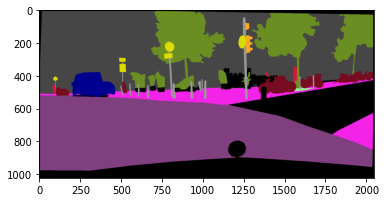

In [ ]:
#string = '/content/drive/MyDrive/Datasets/Cityscapes/images/'+train_dataset.files[0]['name'].split ('/')[1]
from IPython.display import Image

import torch
from torchvision import transforms
from PIL import Image as PIL

convert_tensor = transforms.ToTensor()

img = PIL.open(train_dataset.files[0]['label'])
print(train_dataset.files[0]['name'])
img = np.asarray(img, np.ubyte)
info = json.load(open('/content/drive/MyDrive/Datasets/Cityscapes/info.json', 'r'))
class_mapping = info['label2train']
# remap the semantic label
img = encode_segmap(img, class_mapping, 255)
print(img.shape)
#img=convert_tensor(img).numpy()
img = colour_code_segmentation(img, label_info)
print (type(img), img.shape)
img = PIL.fromarray(img, 'RGB')
#img = Image(train_dataset.files[0]['label'])
plt.imshow(img)
plt.show()
img.show
img.save("test.png")
#print (train_dataset.files[0]['image'])


In [ ]:
Image(train_dataset.files[0]['label'])


In [ ]:
print ("training dataset lenght", len(train_dataset))
print ("validation dataset lenght", len(val_dataset))

training dataset lenght 500
validation dataset lenght 250


Prepare DataLoaders

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)


Prepare the Network

In [ ]:
from AMLproject.BiSeNet.model.build_BiSeNet import BiSeNet

net = BiSeNet (num_classes=19, context_path=BACKBONE)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:
print (net.parameters())

<generator object Module.parameters at 0x7fdb4d148b50>


In [ ]:
net.train()

Some cells for testing 

In [ ]:
print (train_dataset.files)

[{'image': './drive/MyDrive/Datasets/Cityscapes/images', 'label': './drive/MyDrive/Datasets/Cityscapes/labels', 'name': 'strasbourg/strasbourg_000000_017593_leftImg8bit.png'}, {'image': './drive/MyDrive/Datasets/Cityscapes/images', 'label': './drive/MyDrive/Datasets/Cityscapes/labels', 'name': 'zurich/zurich_000066_000019_leftImg8bit.png'}, {'image': './drive/MyDrive/Datasets/Cityscapes/images', 'label': './drive/MyDrive/Datasets/Cityscapes/labels', 'name': 'hanover/hanover_000000_032681_leftImg8bit.png'}, {'image': './drive/MyDrive/Datasets/Cityscapes/images', 'label': './drive/MyDrive/Datasets/Cityscapes/labels', 'name': 'ulm/ulm_000066_000019_leftImg8bit.png'}, {'image': './drive/MyDrive/Datasets/Cityscapes/images', 'label': './drive/MyDrive/Datasets/Cityscapes/labels', 'name': 'dusseldorf/dusseldorf_000006_000019_leftImg8bit.png'}, {'image': './drive/MyDrive/Datasets/Cityscapes/images', 'label': './drive/MyDrive/Datasets/Cityscapes/labels', 'name': 'hamburg/hamburg_000000_068916_le

In [ ]:
cd ..

/content


In [ ]:
ls

build_BiSeNet.py  build_contextpath.py  __init__.py  __pycache__/


In [ ]:
ls

BiSeNet/  dataset/  Exam.ipynb  README.md


In [ ]:
print (train_dataset.files[0])

{'image': './drive/MyDrive/Datasets/Cityscapes/images', 'label': './drive/MyDrive/Datasets/Cityscapes/labels', 'name': 'strasbourg/strasbourg_000000_017593_leftImg8bit.png'}


In [ ]:
cd ..

/


In [ ]:
print

In [ ]:
string = '/content/drive/MyDrive/Datasets/Cityscapes/images/'+train_dataset.files[0]['name'].split ('/')[1]

from IPython.display import Image
Image(string)

